---
# TP1 Bilinéaire : Synthèse de filtres à partir du continu
---

Vous avez en [TD synthétisé un filtre du premier ordre](../td/SYNTH.ipynb) discret avec la méthode bilinéaire.

On va vérifier les calculs en numérique cette fois-ci.


## 1 - Vérification du calcul analytique
---
Dans le [travail préparatoire](../FILT_prepa_tp1.ipynb) vous avez pu trouver l'expression analytique des coefficients de la recurrence du filtre discret à partir de la transformée bilinéaire (ou trapezoidale ou tusin) de la forme :

$$
a_0.y[k]  =  a_1 .y[k-1] + b_0. x[k] + b_1. x[k-1] 
$$

On rencontre dans la littérature (et les outils de calcul) plusieurs conventions de représentation :
  - $G_d(z) = K'. \frac{1 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$ ou bien $G_d(z) = K'. \frac{b_2 z^{2}+ b_1 z + 1}{a_2 z^{2} +  a_1 z + 1}$
  - $G_d(z) = K'. \frac{1 + b_1 z^{-1} + b_2 z^{-2}}{1 - a_1 z^{-1} - a_2 z^{-2}}$ 
  - $G_d(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 - a_1 z^{-1} - a_2 z^{-2}}$ 
  - $G_d(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$ ou bien $G_d(z) = \frac{b_2 z^{2}+ b_1 z + b_0}{a_2 z^{2} +  a_1 z + b_0}$

> **Attention 1 ! En discret K' n'est PAS le gain statique**  
> **Attention 2 ! Erreur de signe fréquente entre la récurrence et $G_g$**. La récurrence ci-dessus correspond à une seule de ces fonctions de transfert, sinon il faut modifier les coefficients ($-a_1$, diviser par $b_0$ ; mulitplier par K' etc.) 


Faites un script qui donne la valeur de ces coefficients en fonction de $K$, $\tau$ et $T_e$ calculés avec votre formule théorique. On prendra la dernière représentation de $G_d$ qui est compatible Matlab/octave :  

$G_d(z) = \frac{ b_1 z + b_0}{ a_1 z + a_0}$ avec $a_1=1$



Corrigez les nombreuses erreurs du code ci-dessous.  
On prendra une pulsation de coupure telle que $\omega_c.T_e=\tilde{f_c}=1/4$. 


In [1]:
clear all; close all; clc;
%% ADAPTER et CORRIGER ce code d'init.
%% Parametres du filtre continu désiré
wc = 1 ;          % pulsation propre [rad/s]

%% Paramètres du filtre discret imposés
Fe = 48e3 ;       % Fréquence d'échantillonnage [Hz]
Te = 0.001;     % Période d'échantillonnage   [s] 

%% MODIFIEZ avec vos formules les paramètres de récurrence
% du genre 
% b1 = (Te-tau)/(Te+tau)
K=1;
b0 = 0.4 ;
b1 = 0.8 ; 
b2 = 0.4 ; 
a0 = 0.6; 
a1 = 0; 
a2 = 1;


%% On affiche les vecteurs de coefs 
num_math=[b1 b0]
den_math=[a1 a0]


num_math =

   0.80000   0.40000

den_math =

   0.00000   0.60000



### Pour vérifier

On peut créer une **fonction anonyme** capable d'évaluer la fonction de transfert pour une valeur de z donnée.

Par exemple `f = @(x,a) 3+x^2*a;` définit en une ligne la fonction $f: (x, a) \mapsto 2+ a\,x^2$ ce qui pourrait être fait de manière équivalente par
```octave
function val = f(x,a)
    val = 2 + a * x^2
end
```

On calcule ensuite avec cette fonction le gain statique et le gain HF :

In [3]:
%% CORRIGEZ l'étourderie dans ce qui suit
% On définit la fonction de transfert (où z peut être vecteur)
Gd = @(z) (b0 + b1 .* z.^(-1) + b2 .* z.^(-2)) ./ (a0 + a1*z.^(-1) + a2*z.^(-2) ) ;
% Indice pour l'erreur : convention Matlab !

%% On vérifie avec le Gain statique
gain_statique = Gd(1)
%% Gain Hautes fréquences
gain_Hf = Gd(-1)
%% Plein de gains
Gd(0:0.1:1);
%% On vérrifie Gd(z=i) <-> f=Fe/4
gain_Fe_sur_4 = Gd(i)
if abs(Gd(i)-(1/(1+i)))<1e-10
    disp("Vous semblez avoir corrigé l'erreur");
else
    disp("Il est possible qu'il y ait une erreur...");
end

gain_statique =  1
gain_Hf = 0
gain_Fe_sur_4 = -0 + 2i
Il est possible qu'il y ait une erreur...


Lancez une console avec `File->New Console For Notebook` et dedans tapez `who` ou tout autre commande à tester.  
Par exemple lancez `Gd([1; i; -1])` pour voir ce que cela donne...

### Verif avec la boite à outils "control"

On va comparer ces valeurs avec celles trouvées numériquement par la fonction `c2d` : "continuous 2 discrete" avec l'argument `"bilinear"`.

On peut accéder à la [doc de c2d](https://octave.sourceforge.io/control/function/@lti/c2d.html) en ligne (le help ne marche pas pour cette version)

Ces valeurs doivent coller à 1ppm près. Sinon revenez avec un prof sur vos calculs et vérifications.

In [4]:
%% Pour octave seulement il faut charger le package control
%% Avec matlab inutile et commentez cette ligne
pkg load control

%% VOTRE CODE G_de_p = tf....
% déclarant la fonction de transfert en continu
% faire "help tf" dans une console si nécessaire 
G_de_p = tf([6,6,6],[9,9,9])

%% VOTRE CODE Gd_c2d = c2d(...)
% passant du continu au discret la fonction de transfert
% c2d prend en argument une TF et en second argument Te
% puis la méthode "zoh", "bilinear" etc.
Gd_c2d = c2d(G_de_p,1,"zoh")



Transfer function 'G_de_p' from input 'u1' to output ...

      6 s^2 + 6 s + 6
 y1:  ---------------
      9 s^2 + 9 s + 9

Continuous-time model.

Transfer function 'Gd_c2d' from input 'u1' to output ...

 y1:  0.6667

Sampling time: 1 s
Discrete-time model.


On verifies que les vecteurs de coefficients trouvés avec c2d et ceux que vous avez analytiquement sont les mêmes.


In [5]:
%% On extrait les coefficients avec .num et .den
num_c2d = Gd_c2d.num{1};
den_c2d = Gd_c2d.den{1};


%% On vérifie que cela colle
disp("")
num_err = num_c2d-num_math;
den_err = den_c2d-den_math;

if (num_err * num_err' > 1e-6)
 disp('Mauvais numérateurs !')
 num_err
else
 disp('Bon numérateur')
 erreur_de = num_err*num_err'
end
if (den_err * den_err' > 1e-6)
 disp('Mauvais dénominateur !')
 den_err
else
 disp('Bon dénominateur')
 erreur_de = den_err*den_err'
end


Mauvais numérateurs !
num_err =

  -0.13333   0.26667

Mauvais dénominateur !
den_err =

   1.00000   0.40000



On pourrait continuer d'utiliser les outils d'octave/Matlab notamment pour afficher 
  - la réponse harmonique avec `bode`
  - la réponse indicielle avec `step`
  - les poles et les zéros avec `pzmap`

Mais ces outils sont parfois obscurs et inadaptés. Et dans notre cas n'aportent pas grand-chose.

Nous allons afficher la réponse harmonique par nos propres moyens et pouvoir voir sa périodicité sous différentes échelles  
**ce que ne permet pas la fonction bode !**

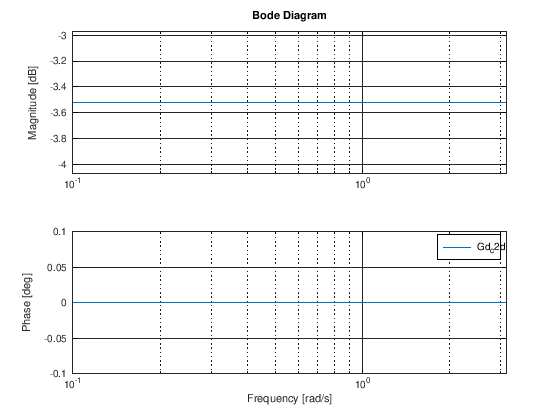

In [6]:
bode(Gd_c2d)

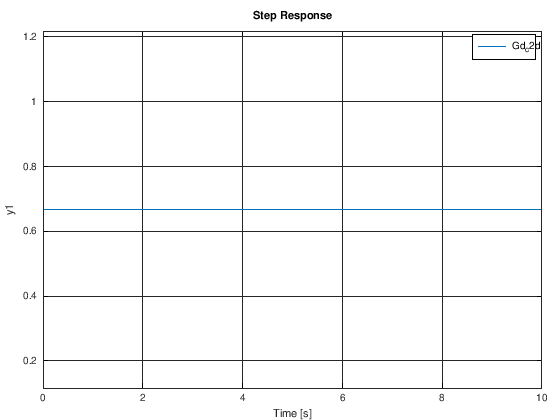

In [7]:
step(Gd_c2d)

error: h(1): out of bound 0
error: called from
    pzmap at line 121 column 5


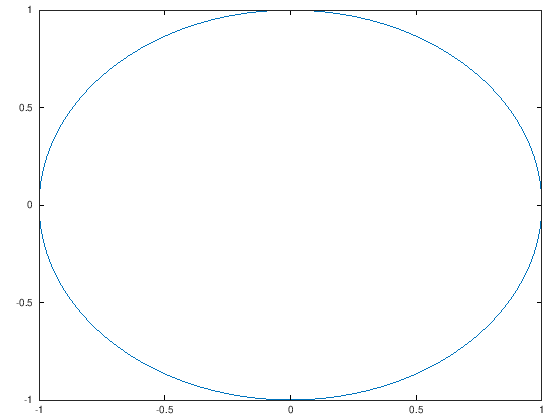

In [8]:
pzmap(Gd_c2d);hold on;
plot(cos(2*pi*(0:0.01:1)),sin(2*pi*(0:0.01:1)))

## 2 - Réponse harmonique 
---
Tracez la réponse harmonique du filtre continu et superposez-la avec celle de votre filtre numérique. 

Préférez l'utilisation de vecteurs $f$, $p$, $z$ et des outils **plots** (comme dans les exemples du notebook du [corrige TD FILT prepa bilineaire](../FILT_prepa_bilineaire_octave_corr.ipynb))


Faites un affichage du :
 - gain de la fonction de transfert en continu en noir (plot avec 'k')
 - de celui de celle en continu en rouge (avec 'r')  
 
avec en abscisse les fréquences linéaires (plot) et en ordonnée le gain en échelle linéaire (abs).



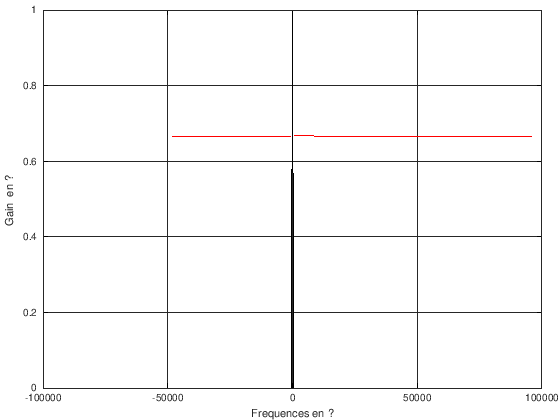

In [9]:
Df = Fe/100;        % résolution fréquentielle d'affichage
f = -Fe: Df: 2*Fe ; % vecteur des fréqeunces [Hz]

%%VOTRE CODE ftilde = , p= , z=
f_tilde = f';      % fréquences normalisées [1<-> Fe]
p = exp(f);        % équivalents harmoniques de p
z = exp(f_tilde);  % équivalents harmoniques de z


% fonction de transfert continue
Gc = @(s,wn,zeta) wn^2./(s.^2 + 2*zeta*wn*s + wn^2)  ;

%%VOTRE CODE G_continu=..., Gd_math=...
% utilisez la fonction anonyme Gd qui prend l'équivalent de z en argument
% pour calculer la fonction de transfert pour chaques fréquences
G_continu = Gc(f,1,1);
Gd_maths = Gd(f);

%%VOTRE affichage ici 
plot(f,G_continu,'k');hold on;
plot(f,Gd_maths,'r');grid on;

%%VOS BONS LABELS
xlabel("Frequences en ?");
ylabel ("Gain  en ? ");

Vous devez constater que :
 - le spectre discret est périodique
 - les fréquences de résonnance ne collent pas !
 
C'est l'effet de la fameuse compression des fréquences ("frequency wrapping") induites par la méthode de la transformation bilinéaire. 

Faites un vrai **tracé de bode** en changeant les fréquences de calcul, car l'échelle log sur l'axe des fréquences ne permet pas d'afficher les fréquences négatives ou nulles : On peut prendre des **fréquences de 100Hz à 10 kHz** par exemple.

On utilise `semilogx` à la place de plot pour avoir les abscisses en échelle log.
On peut caluler le gain en dB avec une fonction anonyme `dB_de`.



In [177]:
Df = Fe/1000;        % résolution fréquentielle plus fine
f = 100: Df: 10*Fe ; % fréquences positives car échelle log !

dB_de = @(gains_complexes) 20*log10(gains_complexes);

%% COPIER/COLLER de la cellule précédente
%% PUIS modif de l'affichage pour passer en 
% échelle log sur x (semilogx)
% dB sur ordonnées (utiliser dB_de)



Si on cherche les fréquences de résonnance en continu et en discret avec la fonction max. On voit que l'on n'a pas le $\omega_n$ voulu...

On ne l'a pas en continu, car on a confondu pulsation naturelle $\omega_n$ et pulsation de raisonnance $\omega_r$

En discret, il va falloir comprendre le phénomène de compression dû à la bilinéaire.

In [178]:
freq_naturelle = wn/2/pi    % on pense que la fréquence wr est wn !!!
wr = wn * sqrt(1-2*zeta** 2);
freq_raisonnance = wr/2/pi
[gain_max, indice]=max(abs(G_continu));
freq_r_continu_mesuree = f(indice) % on à la fréquence du max à Df près
[gain_max, indice]=max(abs(Gd_maths(1:indice))) ;
freq_r_discret_mesuree = f(indice) % en discret ça colle pas



freq_naturelle =  0.15915
freq_raisonnance =  0.0027658
freq_r_continu_mesuree =  4900
freq_r_discret_mesuree =  4900


###  2.1 - Compression fréquencielle 

Regardez la [suite de la vidéo](https://youtu.be/uBZOh7vhjHU?t=587) sur l'effet de compression de la méthode bilinéaire.

Dans la transformation $p = \frac{2}{Te}\frac{z-1}{z+1}$ utilisée, remplacez p par $i\omega_c$ d'un côté et z par son expression $e^{T_e\,i\,\omega}$. On obtient un nombre imaginaire des deux côtés, mais avec une pulsation continue $\omega_c$ et une pulsation pour le discret $\omega$ qui sont différentes. 


Vous retrouvez ainsi la relation de compression entre pulsation en coninue $\omega_c$ et pulsation équivalente par la transormation bilinéaire $\omega$ :
$$ \omega_c = \frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)$$

On a donc égalité entre les expressions  
$G_d(z\equiv e^{i\omega\,T_e}) = G(p = \frac{2}{Te}\frac{z-1}{z+1}) = G(p = \frac{2}{Te}\frac{e^{i\omega\,T_e}-1}{e^{i\omega\,T_e}+1}) = G\left(i\, \frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)\right) = G(i\, \omega_c)$  et donc   
$G_d(z\equiv e^{i\omega\,T_e}) = G(p\equiv i\omega_c) = G(\frac{2}{T_e} \tan\left(i\,\frac{T_e}{2}\omega\right))$ 

Ainsi, si le polynome $G(p)$ a une résonnance pour $\omega_c=\omega_n$ en continu, en discret $G\left(\frac{2}{Te}\frac{z-1}{z+1}\right)$ a une résonnace pour $\frac{2}{T_e} tan(\frac{Te}{2}\omega)=w_n$.

Retrouvez donc analytiquement cette fréquence de résonnance en discret et vérifiez que c'est bien cela qui est observé sur la réponse harmonique.

In [10]:
wc = 1/tau;
fc = wc/2/pi

%% VOTRE CODE wr_discret=
% donnant la pulsation wrdiscrete, une fois wr compressée
% faut-il tan ou atan ?
wc_discret = tan(wc) ;

%% on vérifie si c'est pareil
freq_r_discret = wr_discret/2/pi
freq_r_discret_mesuree

error: 'tau' undefined near line 1 column 8
fc =  0.15915
error: 'wr_discret' undefined near line 2 column 18
error: 'freq_r_discret_mesuree' undefined near line 1 column 1


### 2.2 - Compensation fréquentielle 

Pour terminer, effectuez une précompensation de $\omega_n$ (en anglais "prewarp"):
- on cherche un $\omega_n'$ tel que la résonnance obtenue avec $\omega_c=\omega_r'$ donne une fois compressée par la transformation  une résonnance en discret $\frac{2}{T_e} tan(\frac{Te}{2}\omega)=w_r'$ lorsque $w = \omega_r$.

> On prend en continu un $\omega_r'$ plus grand qui, une fois compressé, donnera le $\omega_r$ recherché.  

> On ne fait pas la confusion entre la pulsation naturelle $\omega_n$ et la pulsation de raisonnance $\omega_r = \omega_n \sqrt{1-2\zeta^2}$

Il faut donc tout reprendre dans cette cellule de calcul :
 - le calcul du $\omega_n$ (naturel) en fonction du $\omega_r$ voulu (raisonnance)
 - le calcul du $\omega_n'$ (prewarp) qui compense la compression (il doit donc être plus grand)
 - le calcul des coefficients $a_0$ à $b_2$ avc ce wn'
 - definir une fonction de transfert Gd_prewarp avec ces gains


In [11]:
clear all; close all; clc;
%% Parametres du filtre continu désiré
wr = 2000 ;% pulsation de raisonnance voulue [rad/s]
zeta = 0.25; % facteur d'amortissement [1]

%% VOTRE calcul de wn=  en fonctionde wr
wn = wr/sqrt(1-2*zeta^2) ;      % pulsation propre [rad/s]

%% COPIER/COLLER de la toute première cellule 
%% MAIS avec votre calcul du wn'
%% wn_wrap = 
wn_wrap =  atan(wn);

%% ET calcul  des a0,a1,...,b2 AVEC wn_wrap
%% PUIS redefinir une fonction anonyme Gd_warp avec ces valeurs
Gd_warp = @(z) (b0 + b1 .* z.^(-1) + b2 .* z.^(-2)) ./ (a0 + a1*z.^(-1) + a2*z.^(-2) ) ;


On refait le tracé de bode et on vérifie les maxs

In [12]:
%% COPIER / COLLER 
% afficher le continu voulu en noir "k"
% le continu prewarp en bleu "b"
% le discret en rouge "r"


Les fréquences de résonnance rouge et noire doivent coller !

Mesurez les fréquences de raisonnance et vérifier que cela colle avec $\omega_r$

In [13]:
%% VOTRE CODE freq_r_continu_mesuree = 
freq_r_continu_mesuree = 42; 
%% VOTRE CODE freq_r_discret_mesuree = 
freq_r_discret_mesuree = 42; % en discret

%% ça doit coller !
fr = wr/2/pi
freq_r_continu_mesuree
freq_r_discret_mesuree

fr =  318.31
freq_r_continu_mesuree =  42
freq_r_discret_mesuree =  42


## 3 - Application : Ré-échantillonnage
---
Allez dans `tp/resample`. Lancez Matlab ou octave.

Ecoutez le fichier `sail_away.wav` qui est à Fe=96KHz.

On aimerait le faire passer à Fe=8 kHz par décimation.

Ouvrez le fichier `resampler.m` et `ADC_conv_interrupt.m` pour effectuer "comme en temps réel sur un STM32" à se ré-échantillonnage...

